
## Import Library
note: import pdal first didnt give error

In [1]:
import pdal

In [2]:
import cv2
import pytesseract
from pdf2image import convert_from_path
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
import geopandas as gpd
from matplotlib.cm import get_cmap
from scipy.spatial import cKDTree
import pandas as pd
import laspy
import fiona
import re
import easyocr
import glob
import json

import open3d as o3d
import copy
from shapely.affinity import rotate, scale, translate
from scipy.spatial import ConvexHull, QhullError
from tabulate import tabulate
from scipy.spatial.transform import Rotation as R


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [60]:
project_name = "kad1"
user_sectie = 'W'
user_perceelnummer = 4533
open = 3
open_it = 3
close = 20
close_it = 1
eps = 0.013
simply = 10 
s_buffer = 8
min_area = 5000
layerbg = "grond_1_verd"

In [44]:
project_name = "kad3"
user_sectie = 'H'
user_perceelnummer = 3502
open = 2
open_it = 2
close = 10
close_it = 2
eps = 0.001
simply = 1 
s_buffer = 5
layerbg = "beganec"

In [75]:
project_name = "kad5"
user_sectie = 'H'
user_perceelnummer = 785
open = 2
open_it = 1
close = 5
close_it = 1
eps = 0.005
simply = 9 
s_buffer = 5
min_area = 500
layerbg = "grond_eerste_verd"

In [76]:
input_dir = "D:/TUDELFT/Thesis/Thesisprep/out/input"  
output_dir = "D:/TUDELFT/Thesis/Thesisprep/out"

#======== Set Input to select parcel based on parcel number========
city_parcel = "D://TUDELFT//Thesis//Thesisprep//New folder//rotterdam//rot_perceel.gpkg"

output_folder = os.path.join(output_dir, project_name)
output_parcel = f"{output_folder}/perceel_{user_sectie}{user_perceelnummer}.gpkg"
# Set Tesseract 
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#========== Set Input to Convert PDF to high-resolution image========
pdf_floorplan = f"{input_dir}/{project_name}.pdf"

floor_keywords = ["kelder", "begane", "verdieping", "verd", "grond"]
output_png = os.path.join(output_folder, "png")

#===== Set Parameter Vectorize =========
# open = 2
# open_it = 1
# close = 5
# close_it = 1
# eps = 0.005
# simply = 9 
# s_buffer = 5
# min_area = 500
output_gpkg = os.path.join(output_folder, f"{project_name}.gpkg")






In [77]:
#======== Set Input Georeference ========
# layerbg = "beganec"
floorplan_gdf = gpd.read_file(output_gpkg, layer=layerbg)

#====== Load georeferenced cadastral polygon (real-world coordinates)
cadastral_gdf = gpd.read_file(output_parcel)
output_geof = os.path.join(output_folder, f"georef_{project_name}.gpkg")

add_flip = False

In [63]:
#============ Kad1 ==========
ahn_id =  "37FZ1_18_kad1n5.LAZ"
add_flip = True
floor_shapefiles = [
    (output_geof, "grond_1_verd", 1),
    (output_geof, "verd_1", 2),
    (output_geof, "verd_2", 3),
]


In [53]:
#============ Kad3 ==========
ahn_id = "37GN2_05_kad3.laz"
floor_shapefiles = [
    (output_geof, "kelder", -1),
    (output_geof, "beganec", 1),
    (output_geof, "1e_verdieping", 2),
    (output_geof, "2e_verdieping", 3),
    (output_geof, "3e_verdieping", 4),
    (output_geof, "4e_verdieping", 5),
]


In [78]:
#============ Kad5 ==========
ahn_id =  "37FZ1_18_kad1n5.LAZ"

floor_shapefiles = [
    (output_geof, "grond_eerste_verd", 1),
    (output_geof, "eerste_verd_tweedec", 2),
    (output_geof, "tweede_verd", 3),
    (output_geof, "verd_gemeente_hillegersberg", 4),
]


In [79]:
#========= Set to Crop AHN =======
laz_file = os.path.join(output_dir,"input", ahn_id)
buffer_dist = 1
output_cropahn = os.path.join(output_folder, "ahn_crop", f"cropahn_{project_name}_{buffer_dist}m.LAZ")
#========= Set to Generate PC =======
POINT_DENSITY = 10  # points per meter
SPACING = 1 / POINT_DENSITY  # 0.1m spacing

ahn_files = glob.glob(os.path.join(output_folder, "ahn_crop", "*.LAZ"))
print(ahn_files)
output_segahn = os.path.join(output_folder, f"segmented_bahn{project_name}.laz")

synthlas_output = os.path.join(output_folder, f"{project_name}_synth.las")
csv_output = os.path.join(output_folder, f"{project_name}.csv")

output_icp = os.path.join(output_folder, f"{project_name}_icp.las")
output_combineipcahn =  output_icp.replace(".las", "_combined10.las")

['D:/TUDELFT/Thesis/Thesisprep/out\\kad5\\ahn_crop\\bahn1_kad5_1m.LAZ', 'D:/TUDELFT/Thesis/Thesisprep/out\\kad5\\ahn_crop\\bahn2_kad5_1m.LAZ', 'D:/TUDELFT/Thesis/Thesisprep/out\\kad5\\ahn_crop\\bahn3_kad5_1m.LAZ', 'D:/TUDELFT/Thesis/Thesisprep/out\\kad5\\ahn_crop\\bahn4_kad5_1m.LAZ', 'D:/TUDELFT/Thesis/Thesisprep/out\\kad5\\ahn_crop\\bahn5_kad5_1m.LAZ']


### Export selected parcel based on perceelnummer

In [ ]:

gdf_parcel = gpd.read_file(city_parcel)

# Apply attribute filter
filtered = gdf_parcel[(gdf_parcel['sectie'] == user_sectie) & (gdf_parcel['perceelnummer'] == user_perceelnummer)]

# Save result
filtered.to_file(output_parcel, driver="GPKG")


# Floorplan


## Preprocessing PDF into single PNG per floor

✅ Saved: D:/TUDELFT/Thesis/Thesisprep/out\kad5\png\derde_verd.png
✅ Saved: D:/TUDELFT/Thesis/Thesisprep/out\kad5\png\derde_verd_gemeente.png
✅ Saved: D:/TUDELFT/Thesis/Thesisprep/out\kad5\png\verd_gemeente_hillegersberg.png
✅ Saved: D:/TUDELFT/Thesis/Thesisprep/out\kad5\png\beg_grond.png
✅ Saved: D:/TUDELFT/Thesis/Thesisprep/out\kad5\png\beg_grond_eerste.png
✅ Saved: D:/TUDELFT/Thesis/Thesisprep/out\kad5\png\grond_eerste_verd.png
✅ Saved: D:/TUDELFT/Thesis/Thesisprep/out\kad5\png\eerste_verd_tweede.png
✅ Saved: D:/TUDELFT/Thesis/Thesisprep/out\kad5\png\verd_tweede_verd.png
✅ Saved: D:/TUDELFT/Thesis/Thesisprep/out\kad5\png\tweede_verd.png
✅ Saved: D:/TUDELFT/Thesis/Thesisprep/out\kad5\png\verd.png


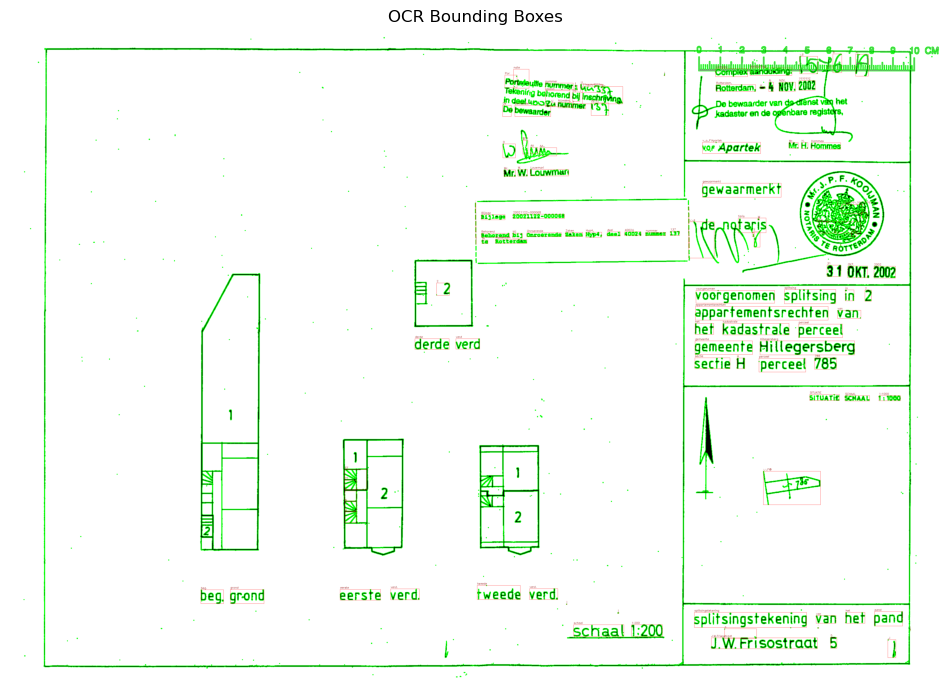

In [70]:
images = convert_from_path(pdf_floorplan, dpi=300)
image = images[0]
image_np = np.array(image)
gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
horizontal_threshold = image_np.shape[1] * 0.3  # 10% of image width


# OCR to detect text and bounding boxes

ocr_data = pytesseract.image_to_data(gray, lang='nld', output_type=pytesseract.Output.DICT)

# Detect contours (potential plan areas)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 30, 100)
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# Make a copy of the image for drawing
contour_debug = image_np.copy()

# Draw all detected contours in green (thickness = 2)
cv2.drawContours(contour_debug, contours, -1, (0, 255, 0), 2)

# Save the debug image so you can inspect it
# plt.figure(figsize=(12, 12))
# plt.imshow(cv2.cvtColor(contour_debug, cv2.COLOR_BGR2RGB))
# plt.title("All Contours")
# plt.axis("off")
# plt.show()

# Convert image to PIL for cropping
pil_image = Image.fromarray(image_np)

# Keywords to search for

os.makedirs(output_png, exist_ok=True)
processed_labels = set()

# Loop through each detected OCR text item
for i, text in enumerate(ocr_data['text']):

    full_text = " ".join(ocr_data['text'][i:i+3]).lower()  # Try to capture phrases like "2e verdieping"
    if any(keyword in full_text for keyword in floor_keywords):


        # Get the bounding box of the detected label text
        x, y, w, h = (
            ocr_data['left'][i],   # X position (left)
            ocr_data['top'][i],    # Y position (top)
            ocr_data['width'][i],  # Width of the text box
            ocr_data['height'][i]  # Height of the text box
        )

        # Format the label text (e.g., "Begane grond" → "begane_grond")
        # Format label safely
        label_text = full_text.replace(" ", "_").strip("_")
        import re

        label_text = re.sub(r"[^a-z0-9_]", "", label_text.lower())  # Clean unwanted characters
        label_text = re.sub(r"_+", "_", label_text).strip("_")      # Collapse double underscores

        
        # Skip if already processed
        if label_text in processed_labels:
            continue

        # Prepare to search for the closest contour (floor plan shape) ABOVE this label
        closest_contour = None
        min_distance = float('inf')  # Start with "infinity" for comparison

        # Loop through all contours (shapes) found in the image
        for cnt in contours:
            # Get the bounding box of the contour
            x_cnt, y_cnt, w_cnt, h_cnt = cv2.boundingRect(cnt)

            label_center_x = x + w // 2

            if y_cnt + h_cnt < y and (x_cnt <= label_center_x <= x_cnt + w_cnt):
                distance = y - (y_cnt + h_cnt)
                if distance < min_distance:
                    min_distance = distance
                    closest_contour = (x_cnt, y_cnt, w_cnt, h_cnt)


        # If a matching contour was found above the label
        if closest_contour:
            x_c, y_c, w_c, h_c = closest_contour

            # Crop the original image using the bounding box of that contour
                        # Define margin in pixels
            margin = 30  # You can increase or decrease this
            
            # Apply the margin safely (stay within image bounds)
            x1 = max(x_c - margin, 0)
            y1 = max(y_c - margin, 0)
            x2 = min(x_c + w_c + margin, image_np.shape[1])
            y2 = min(y_c + h_c + margin, image_np.shape[0])
            
            # Crop with margin
            cropped = pil_image.crop((x1, y1, x2, y2))

            # Save the cropped image using the label as filename
            output_pngs = os.path.join(output_png, f"{label_text}.png")
            cropped.save(output_pngs)
            print(f"✅ Saved: {output_pngs}")
            processed_labels.add(label_text)


                # If no suitable contour was found
        else:
            # fallback: big area above label
            fallback_top = max(y - 600, 0)
            fallback_crop = pil_image.crop((max(x - 200, 0), fallback_top, min(x + w + 200, image_np.shape[1]), y))
            fallback_path = os.path.join(output_png, f"{label_text}_fallback.png")
            fallback_crop.save(fallback_path)
            print(f"⚠️ Used fallback for {label_text}: {fallback_path}")

# Copy for debugging
debug = image_np.copy()

# Draw contours in green
cv2.drawContours(debug, contours, -1, (0, 255, 0), 2)

# Draw OCR boxes
for i, text in enumerate(ocr_data['text']):
    if text.strip() != "":
        x, y, w, h = ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i]
        cv2.rectangle(debug, (x, y), (x + w, y + h), (0, 0, 255), 1)
        cv2.putText(debug, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 139), 1)

plt.figure(figsize=(12, 12))
plt.imshow(cv2.cvtColor(debug, cv2.COLOR_BGR2RGB))
plt.title("OCR Bounding Boxes")
plt.axis("off")
plt.show()



## Vectorize Floorplan

🧱 Processing: eerste_verd_tweedec


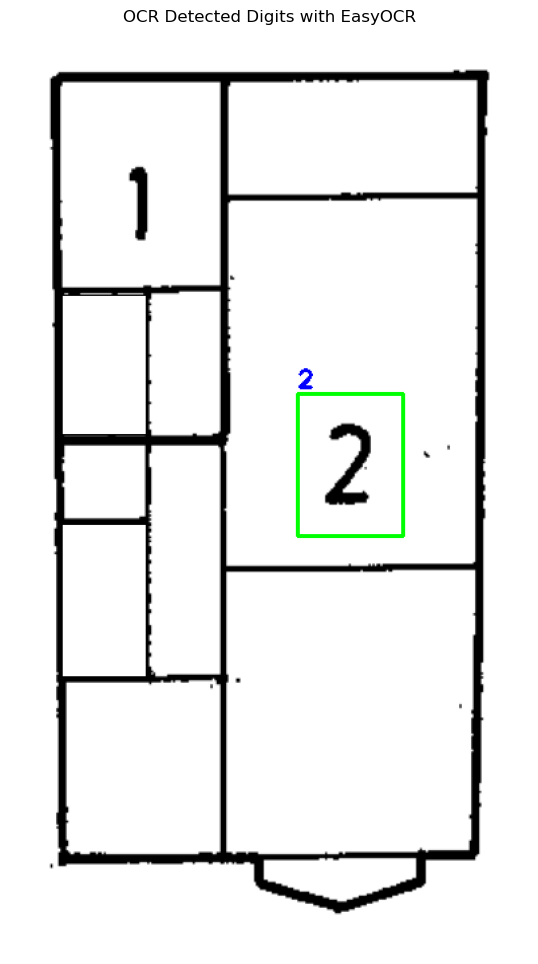

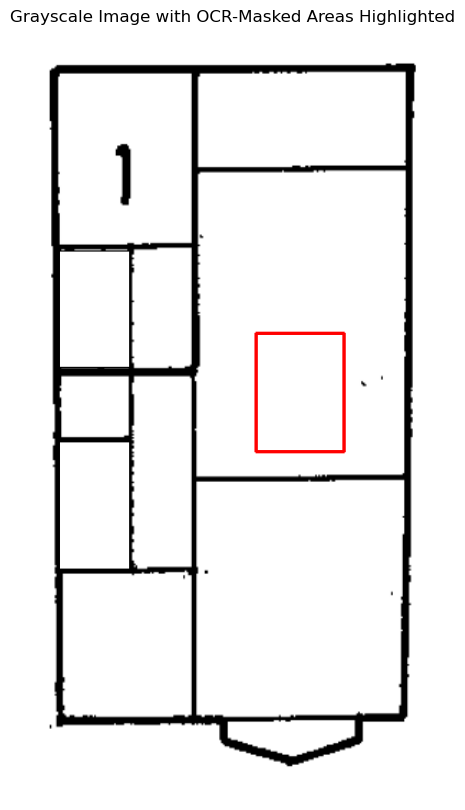

✅ Saved 12 rooms to layer: eerste_verd_tweedec
🧱 Processing: grond_eerste_verd


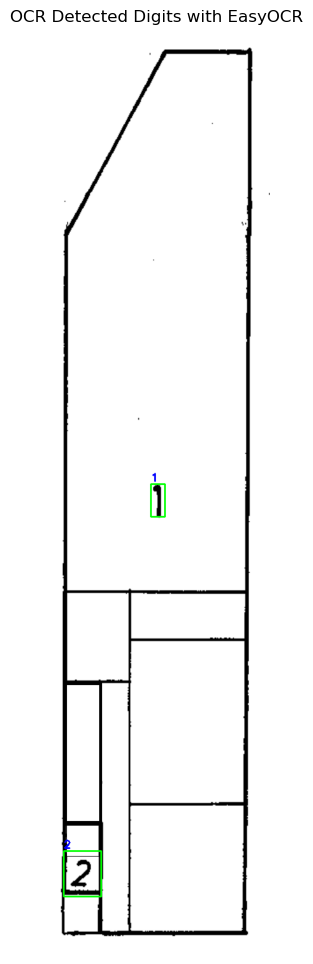

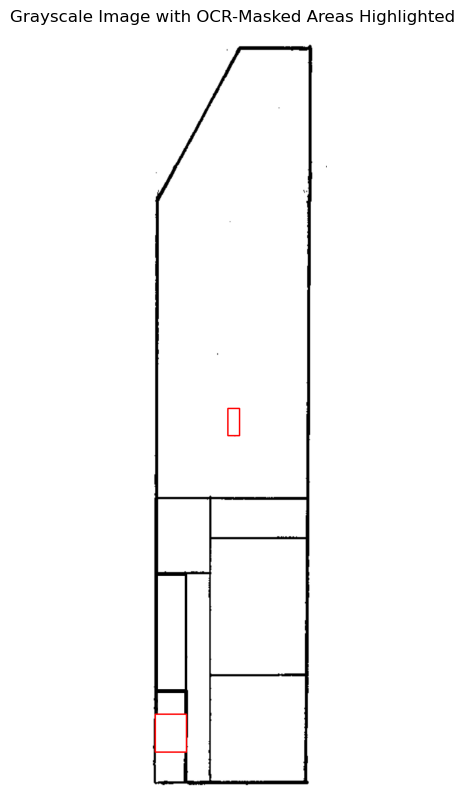

✅ Saved 9 rooms to layer: grond_eerste_verd
🧱 Processing: tweede_verd


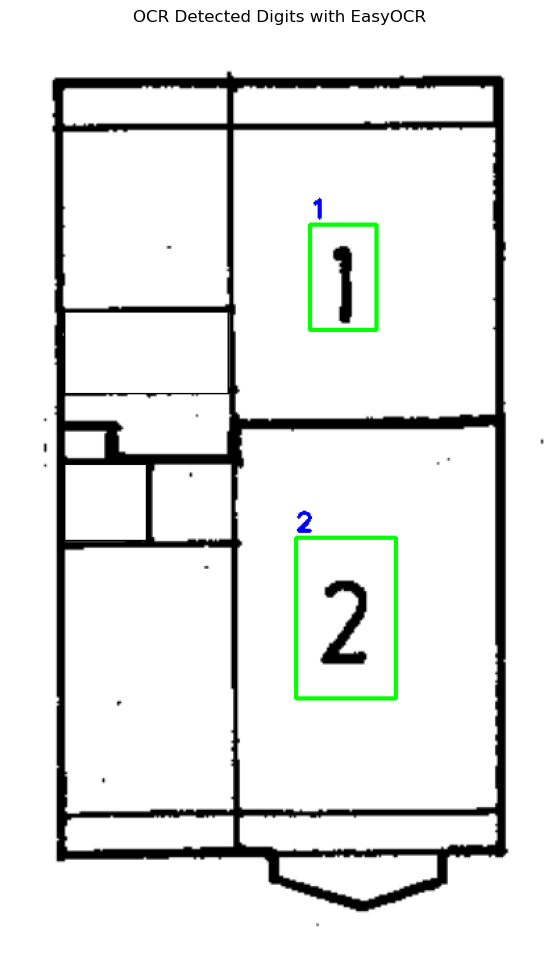

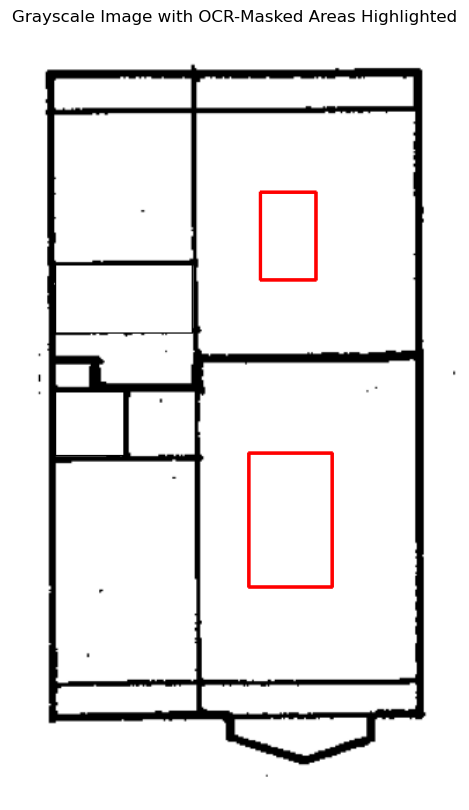

✅ Saved 14 rooms to layer: tweede_verd
🧱 Processing: verd_gemeente_hillegersberg


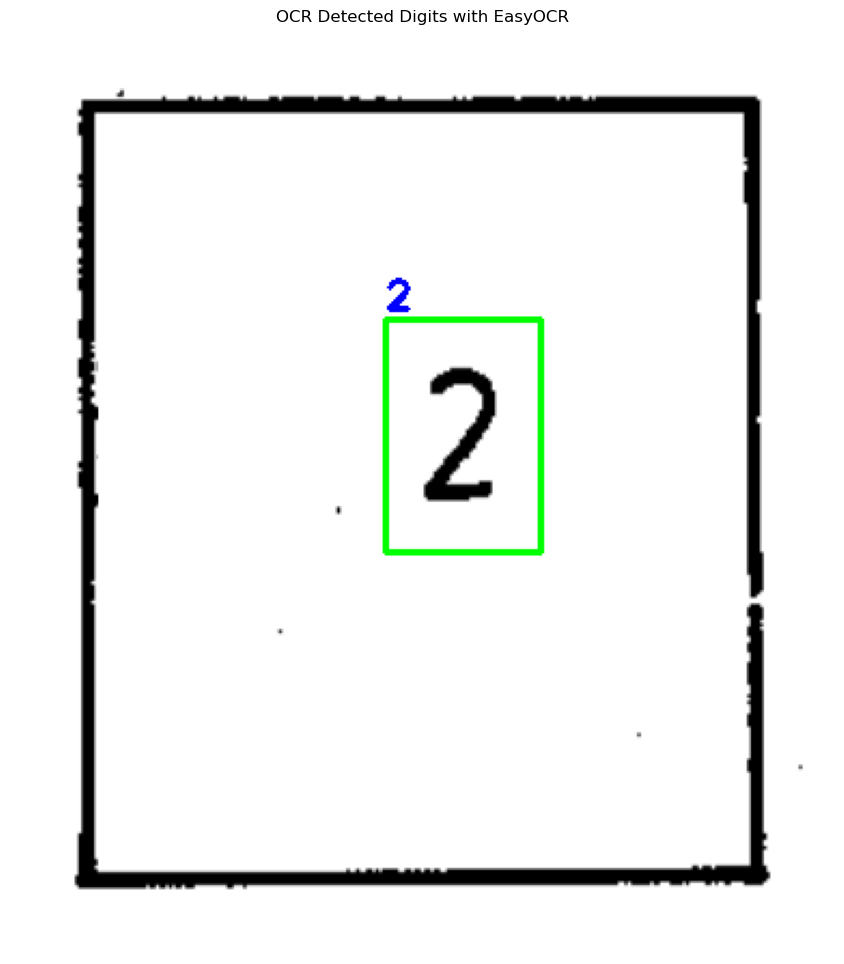

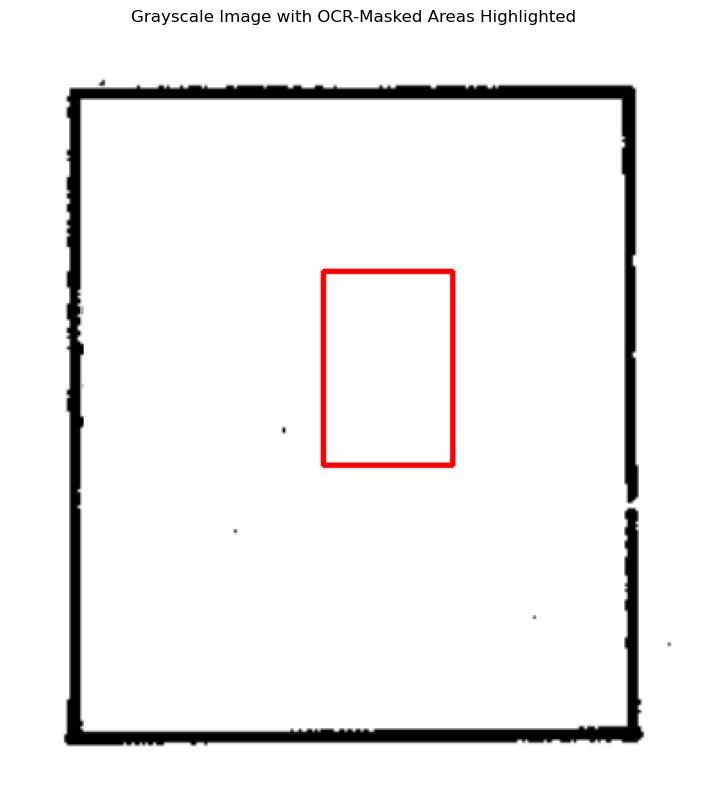

✅ Saved 2 rooms to layer: verd_gemeente_hillegersberg
📦 All thick-walled rooms saved to: D:/TUDELFT/Thesis/Thesisprep/out\kad5\kad5.gpkg
Available layers: ['beg_grond', 'beg_grond_eerste', 'eerste_verd_tweedec', 'grond_eerste_verd', 'tweede_verd', 'verd_gemeente_hillegersberg']
🧾 Layer 'beg_grond' - 19 features


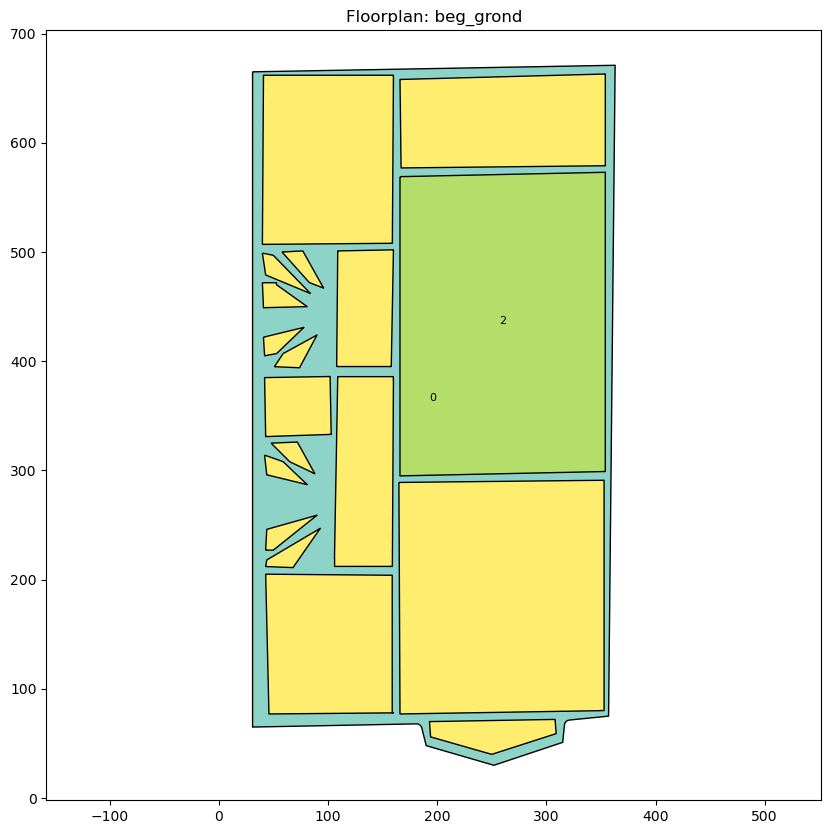

🧾 Layer 'beg_grond_eerste' - 12 features


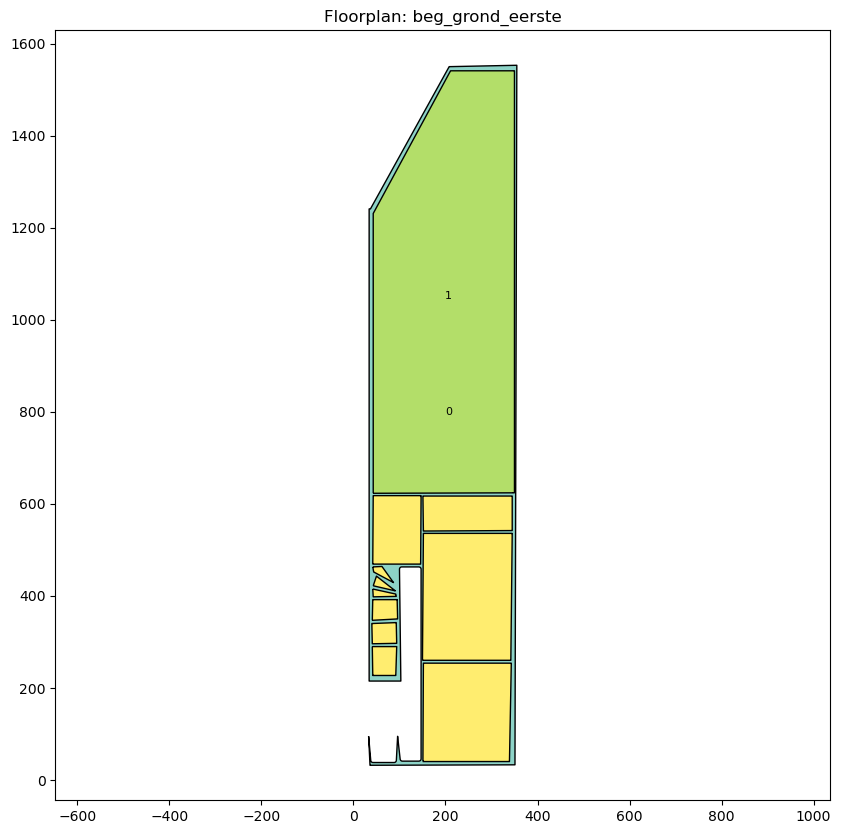

🧾 Layer 'eerste_verd_tweedec' - 12 features


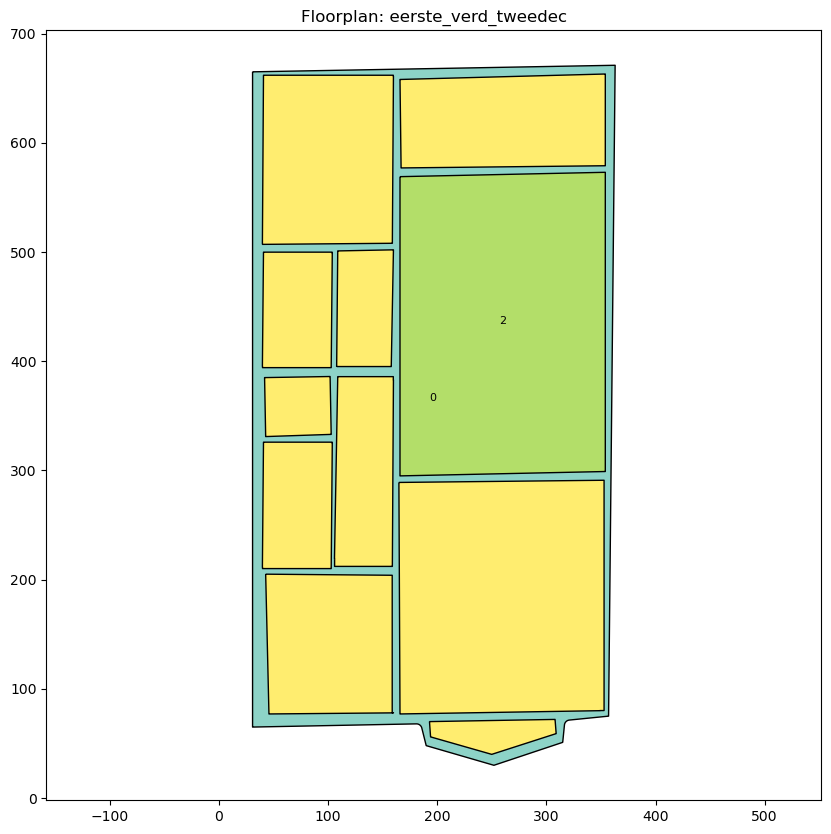

🧾 Layer 'grond_eerste_verd' - 9 features


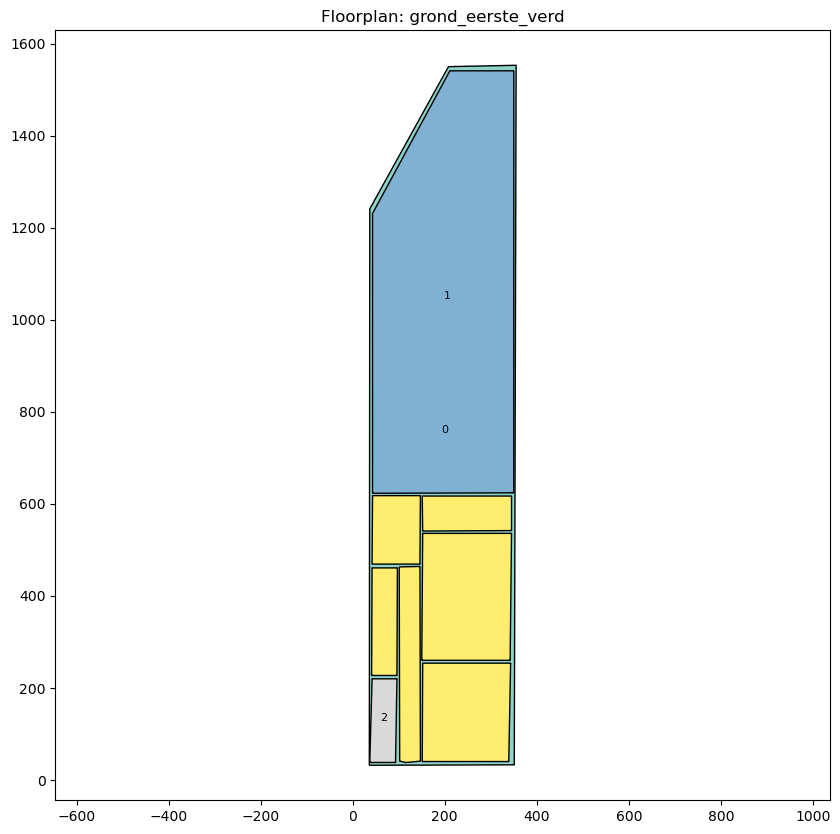

🧾 Layer 'tweede_verd' - 14 features


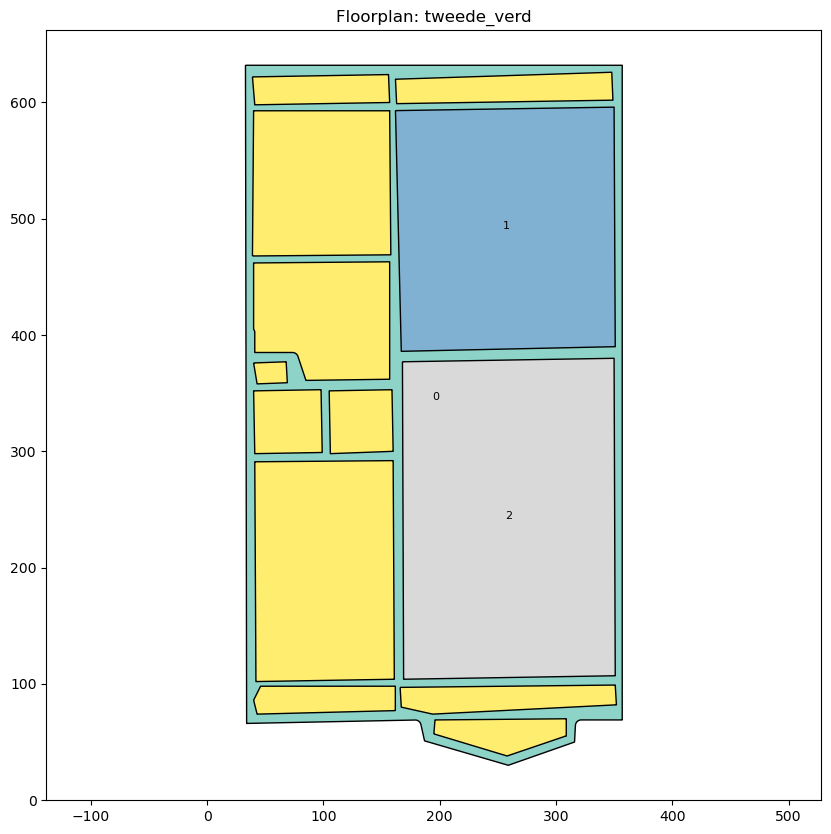

🧾 Layer 'verd_gemeente_hillegersberg' - 2 features


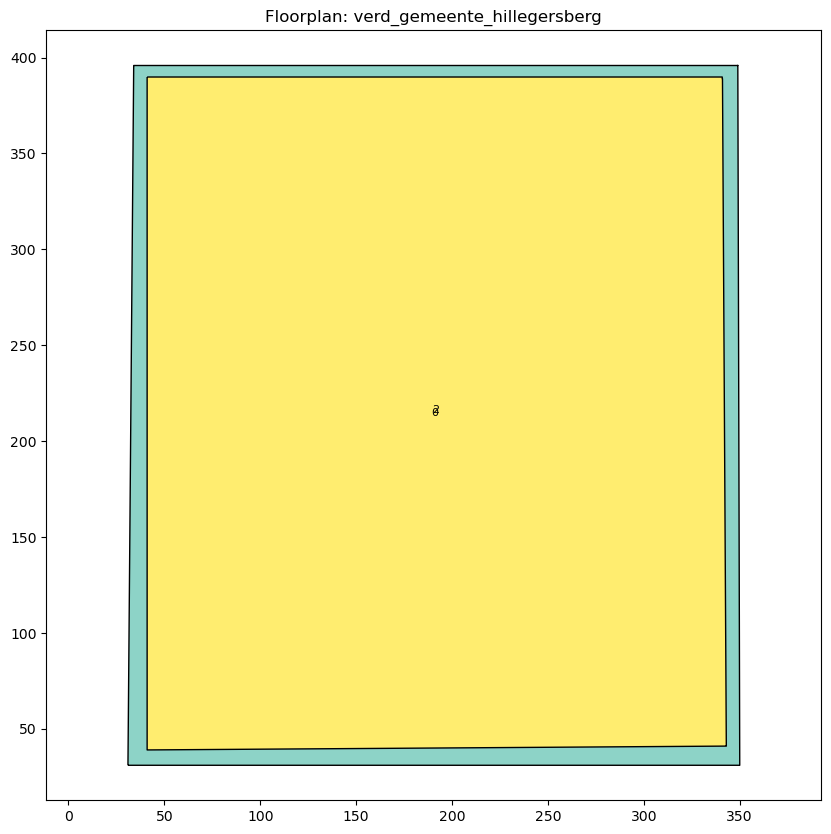

In [72]:
def rectangularize_polygon(poly, angle_threshold=10):
    coords = np.array(poly.exterior.coords)

    def angle(p1, p2, p3):
        a = np.array(p1)
        b = np.array(p2)
        c = np.array(p3)
        ba = a - b
        bc = c - b
        cos_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        return np.arccos(np.clip(cos_angle, -1.0, 1.0)) * 180 / np.pi

    def snap_to_axis(p1, p2):
        dx = abs(p1[0] - p2[0])
        dy = abs(p1[1] - p2[1])
        if dx < dy:
            return (p1[0], p2[1])
        else:
            return (p2[0], p1[1])

    new_coords = [coords[0]]
    for i in range(1, len(coords) - 1):
        prev = new_coords[-1]
        current = coords[i]
        next_pt = coords[i + 1]
        ang = angle(prev, current, next_pt)

        if abs(ang - 90) < angle_threshold:
            snapped = snap_to_axis(prev, next_pt)
            new_coords.append(snapped)
        else:
            new_coords.append(current)

    new_coords.append(coords[-1])
    return Polygon(new_coords)

# Loop through each PNG floorplan
for filename in os.listdir(output_png):
    if not filename.endswith(".png"):
        continue

    label = os.path.splitext(filename)[0]
    image_path = os.path.join(output_png, filename)
    print(f"🧱 Processing: {label}")

    img = cv2.imread(image_path)
    if img is None:
        print(f"⚠️ Could not load image: {filename}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height = img.shape[0]

    # --- Step 1: OCR for numbers using EasyOCR ---
    reader = easyocr.Reader(['nl'], gpu=True)
    results = reader.readtext(gray, low_text = 0.1, text_threshold = 0.1, link_threshold = 0.6)
    
    ocr_points = []
    ocr_texts = []
    ocr_masks = []  # To store OCR bounding boxes as masks
    
    # Visualization setup
    ocr_debug = img.copy()
    
    for bbox, text, confidence in results:
        top_left, top_right, bottom_right, bottom_left = bbox
        x_min, y_min = map(int, top_left)
        x_max, y_max = map(int, bottom_right)
    
        # Only keep text that is a single digit
        if len(text.strip()) == 1 and text.strip().isdigit():
            ocr_points.append(Point((x_min + x_max) / 2, (y_min + y_max) / 2))
            ocr_texts.append(text.strip())
    
            # Store mask rectangle to erase later
            ocr_masks.append(((x_min, y_min), (x_max, y_max)))
    
            # Visualization of OCR rectangles
            cv2.rectangle(ocr_debug, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(ocr_debug, text.strip(), (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    
    # Erase OCR-labeled regions from grayscale image before vectorization
    for (x_min, y_min), (x_max, y_max) in ocr_masks:
        cv2.rectangle(gray, (x_min, y_min), (x_max, y_max), 255, -1)  # fill white
    
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(ocr_debug, cv2.COLOR_BGR2RGB))
    plt.title("OCR Detected Digits with EasyOCR")
    plt.axis("off")
    plt.show()
    # --- Visualize OCR-masked areas on grayscale image ---
    gray_with_masks = cv2.cvtColor(gray.copy(), cv2.COLOR_GRAY2BGR)
    
    # Draw rectangles on a copy to highlight removed areas in red
    for (x_min, y_min), (x_max, y_max) in ocr_masks:
        cv2.rectangle(gray_with_masks, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)  # red border
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(gray_with_masks, cv2.COLOR_BGR2RGB))
    plt.title("Grayscale Image with OCR-Masked Areas Highlighted")
    plt.axis("off")
    plt.show()

    
    # --- Step 2: Detect enclosed "thick line" rooms ---
    # Step 2: Preprocessing to isolate thick-lined rooms
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    # _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    # --- Remove thin lines (walls, stairs, labels) using morphological opening ---
    open_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (open, open))
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, open_kernel, iterations=open_it)
    
    # --- Then close remaining gaps to form full room blobs ---
    close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (close, close))  # plays with wall thickness
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, close_kernel, iterations=close_it)

    # --- Now detect nested contours (RETR_TREE includes hierarchy) ---
    contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    room_polygons = []
    room_ids = []
    
    for idx, cnt in enumerate(contours):
 
        area = cv2.contourArea(cnt)
        if area < min_area:
            continue  # skip noise or small features
    
        epsilon = eps * cv2.arcLength(cnt, True)  # FIX: Use individual contour here
        simplified_cnt = cv2.approxPolyDP(cnt, epsilon, True)
    
        flipped = [(pt[0][0], height - pt[0][1]) for pt in simplified_cnt]
        poly = Polygon(flipped)
        if not poly.is_valid:
            continue
    
        # Step 1: Simplify shape
        simplified_poly = poly.simplify(simply, preserve_topology=True)
        if not simplified_poly.is_valid or simplified_poly.is_empty:
            continue
    
        # Step 2: Clean indentations
        cleaned_poly = simplified_poly.buffer(s_buffer).buffer(-s_buffer)
        if not cleaned_poly.is_valid or cleaned_poly.is_empty:
            continue
    
        # Step 3: Rectify angles
        rectified_poly = rectangularize_polygon(cleaned_poly)
        if not rectified_poly.is_valid or rectified_poly.is_empty:
            continue
    
        # Step 4: OCR-based room ID assignment
        assigned_id = None
        for pt, txt in zip(ocr_points, ocr_texts):
            pt_flipped = Point(pt.x, height - pt.y)
            if rectified_poly.contains(pt_flipped):
                assigned_id = txt
                break
    
        room_polygons.append(rectified_poly)
        room_ids.append(assigned_id)
    

    # --- Assign k_id = 0 to the biggest polygon ---
    if room_polygons:
        # Find index of largest polygon
        areas = [poly.area for poly in room_polygons]
        largest_idx = np.argmax(areas)
    
        # Overwrite the largest room's ID with '0'
        room_ids[largest_idx] = '0'


    if not room_polygons:
        print(f"⚠️ No thick-lined rooms found in: {label}")
        continue

    # --- Step 3: Save to GPKG as layer per floorplan ---
    gdf = gpd.GeoDataFrame({'k_id': room_ids, 'geometry': room_polygons}, crs="EPSG:28992")
    gdf.to_file(output_gpkg, layer=label, driver="GPKG")
    print(f"✅ Saved {len(gdf)} rooms to layer: {label}")

print(f"📦 All thick-walled rooms saved to: {output_gpkg}")
# List layers
# List all layers in the GPKG
layers = fiona.listlayers(output_gpkg)
print("Available layers:", layers)

for layer in layers:
    gdf = gpd.read_file(output_gpkg, layer=layer)
    print(f"🧾 Layer '{layer}' - {len(gdf)} features")

    if gdf.empty:
        print(f"⚠️ Layer '{layer}' is empty. Skipping...")
        continue

    # Replace None values in room_id with 'unknown' or similar
    gdf['k_id'] = gdf['k_id'].fillna('unknown')

    # Plot the geometries
    ax = gdf.plot(column="k_id", cmap="Set3", edgecolor="black", figsize=(10, 10))
    
    # Annotate with room_id if available
    for idx, row in gdf.iterrows():
        if row['k_id'] != 'unknown':
            centroid = row['geometry'].centroid
            ax.annotate(row['k_id'], xy=(centroid.x, centroid.y), ha='center', fontsize=8)

    plt.title(f"Floorplan: {layer}")
    plt.axis("equal")
    plt.show()


### Georeference Floor plan Using Minimum Bounding Rectangle (MBR) 

for multiple layers in one gpkg

📚 Layers found: ['eerste_verd_tweedec', 'grond_eerste_verd', 'tweede_verd', 'verd_gemeente_hillegersberg']
✅ CRS transformation completed successfully!
🚧 Processing layer: eerste_verd_tweedec
✅ Saved transformed layer 'eerste_verd_tweedec' to D:/TUDELFT/Thesis/Thesisprep/out\kad5\georef_kad5.gpkg
🚧 Processing layer: grond_eerste_verd
✅ Saved transformed layer 'grond_eerste_verd' to D:/TUDELFT/Thesis/Thesisprep/out\kad5\georef_kad5.gpkg
🚧 Processing layer: tweede_verd
✅ Saved transformed layer 'tweede_verd' to D:/TUDELFT/Thesis/Thesisprep/out\kad5\georef_kad5.gpkg
🚧 Processing layer: verd_gemeente_hillegersberg
✅ Saved transformed layer 'verd_gemeente_hillegersberg' to D:/TUDELFT/Thesis/Thesisprep/out\kad5\georef_kad5.gpkg
🎉 All layers processed and saved with georeferenced alignment.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34988\1952534160.py:206: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper right", fontsize=9)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34988\1952534160.py:206: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right", fontsize=9)


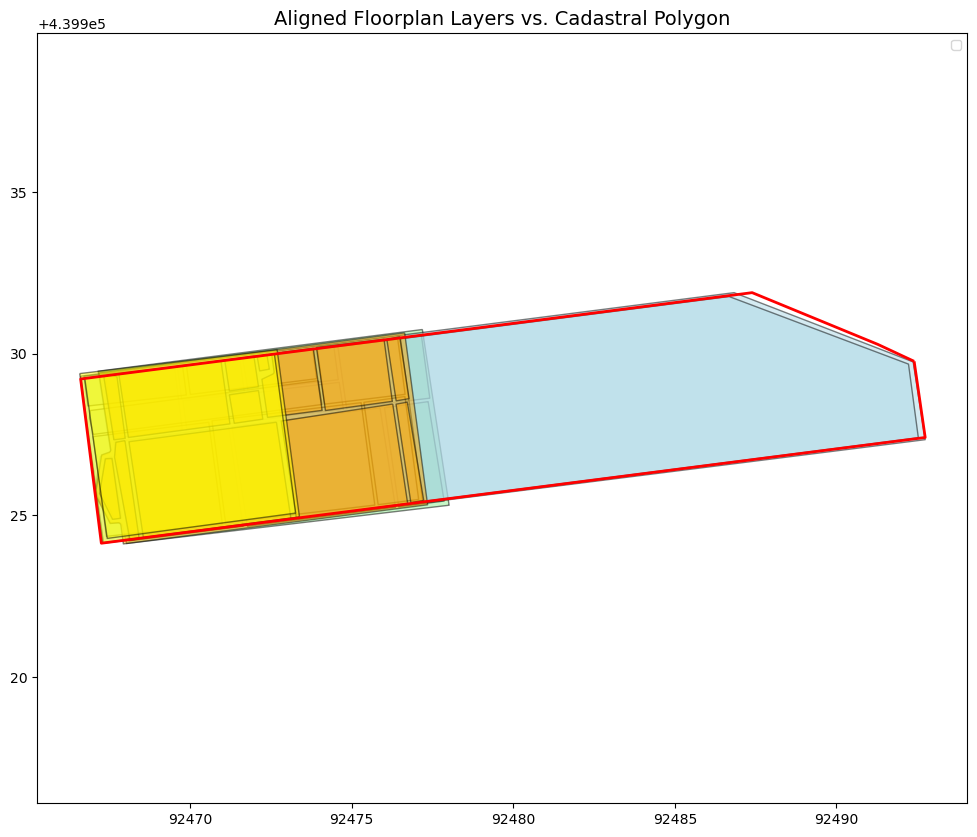

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34988\1952534160.py:249: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34988\1952534160.py:264: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper right", fontsize=9)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34988\1952534160.py:264: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right", fontsize=9)


Index P1 (x,y)                 Nearest P2 (x,y)         Distance  
-----------------------------------------------------------------
0     (92486.832, 439931.891)  (92487.391, 439931.891)  0.558973  
1     (92486.834, 439931.89)   (92487.391, 439931.891)  0.556980  
2     (92492.37, 439929.75)    (92492.402, 439929.767)  0.036245  
3     (92492.372, 439929.749)  (92492.402, 439929.767)  0.035081  
4     (92492.372, 439929.747)  (92492.402, 439929.767)  0.035755  
5     (92492.744, 439927.345)  (92492.744, 439927.411)  0.065899  
6     (92492.744, 439927.343)  (92492.744, 439927.411)  0.067937  
7     (92492.742, 439927.343)  (92492.744, 439927.411)  0.068230  
8     (92467.329, 439924.14)   (92467.26, 439924.14)    0.068610  
9     (92467.327, 439924.14)   (92467.26, 439924.14)    0.066559  
-----------------------------------------------------------------
                                                  RMSE: 0.257055


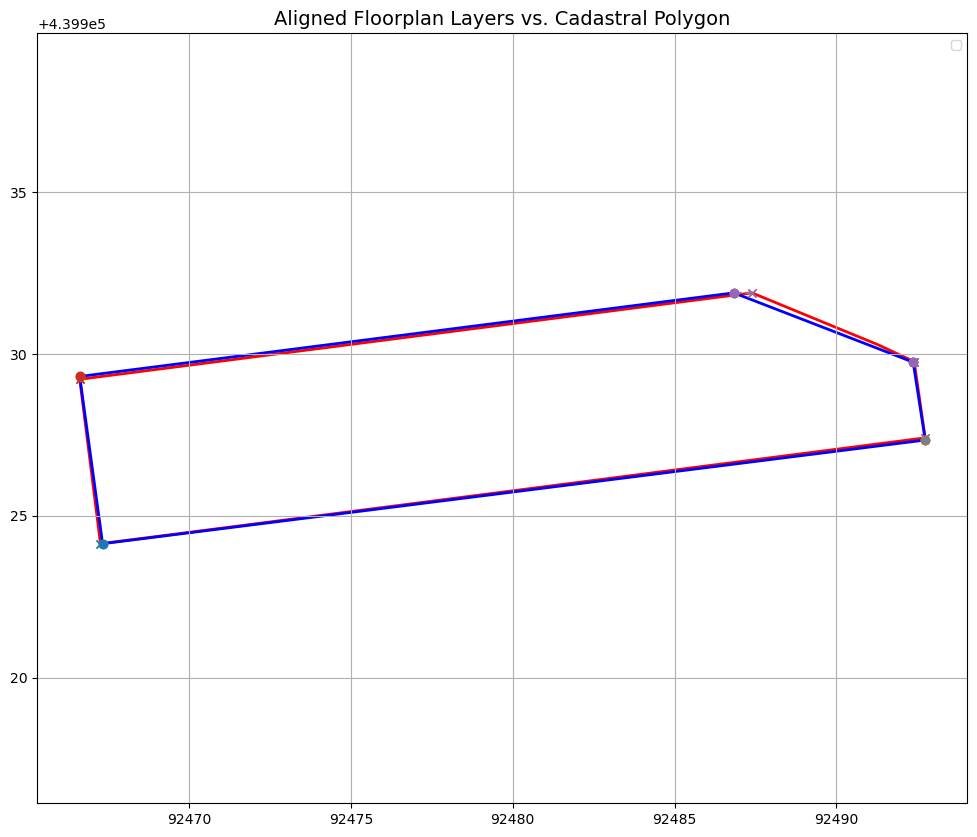

Final RMSE between polygons: 0.2571


In [80]:
layers = fiona.listlayers(output_gpkg)
print("📚 Layers found:", layers)

if floorplan_gdf.crs is None:
    print("⚠️ Floorplan CRS is missing! Setting to assumed local CRS (EPSG:28992)...")
    floorplan_gdf.set_crs("EPSG:28992", inplace=True)  # Set a default CRS
# ✅ Override the incorrect CRS if necessary
if floorplan_gdf.crs == "EPSG:4326":
    print("⚠️ Floorplan CRS is incorrect! Overriding to an assumed local CRS...")
    floorplan_gdf.set_crs("EPSG:28992", allow_override=True, inplace=True)  # Set a local projected CRS

# ✅ Now transform to match the cadastral dataset
if floorplan_gdf.crs != cadastral_gdf.crs:
    print(f"✅ Transforming floorplan CRS from {floorplan_gdf.crs} to {cadastral_gdf.crs}...")
    floorplan_gdf = floorplan_gdf.to_crs(cadastral_gdf.crs)

# ✅ Ensure No Infinite or Corrupt Geometries
def fix_infinity_geometry(geom):
    """Detects and removes geometries with infinity values."""
    bounds = np.array(geom.bounds)
    if np.any(np.isinf(bounds)) or np.any(np.isnan(bounds)):
        print("⚠️ Detected invalid geometry with infinity values:", geom)
        return None  # Remove invalid geometries
    return geom

floorplan_gdf["geometry"] = floorplan_gdf["geometry"].apply(fix_infinity_geometry)
floorplan_gdf = floorplan_gdf.dropna(subset=["geometry"])  # Remove invalid geometries

print("✅ CRS transformation completed successfully!")


# ✅ Safer cleaning function: Fix invalid geometries without removing too many
def clean_geometry(geom):
    """Fix geometries but avoid removing valid ones unnecessarily."""
    if geom is None or geom.is_empty:
        return None  # Remove only truly empty geometries

    bounds = np.array(geom.bounds)
    if np.any(np.isinf(bounds)) or np.any(np.isnan(bounds)):
        print("⚠️ Geometry has invalid bounds but keeping it:", geom)
        return geom.buffer(0)  # ✅ Try fixing it instead of removing

    return geom  # ✅ Keep everything else

# ✅ Apply cleaning while keeping as many geometries as possible
floorplan_gdf["geometry"] = floorplan_gdf["geometry"].apply(clean_geometry)


# ✅ Drop only truly invalid geometries
floorplan_gdf = floorplan_gdf.dropna(subset=["geometry"])

# ✅ Final check before merging
if floorplan_gdf.empty:
    raise ValueError("🚨 Error: No valid geometries remain after cleaning! Fix dataset before merging.")

# ✅ Merge all room segments safely
floorplan_merged = floorplan_gdf.unary_union

# ✅ Extract cadastral polygon
cadastral_polygon = cadastral_gdf.geometry.iloc[0]


def get_minimum_bounding_rectangle_angle(polygon):
    """
    Find the angle of the minimum bounding rectangle for orientation correction.
    """
    if polygon.is_empty:
        return 0

    # Get the convex hull first
    hull = polygon.convex_hull
    coords = np.array(hull.exterior.coords)

    min_area = float("inf")
    best_angle = 0

    for i in range(len(coords) - 1):
        dx = coords[i + 1][0] - coords[i][0]
        dy = coords[i + 1][1] - coords[i][1]
        angle = np.arctan2(dy, dx)

        rotated = rotate(polygon, -np.degrees(angle), origin="centroid")
        bounds = rotated.bounds
        area = (bounds[2] - bounds[0]) * (bounds[3] - bounds[1])

        if area < min_area:
            min_area = area
            best_angle = np.degrees(angle)

    return best_angle

flip_bbox = floorplan_gdf.total_bounds
flip_center_x = (flip_bbox[0] + flip_bbox[2]) / 2
flip_center_y = (flip_bbox[1] + flip_bbox[3]) / 2

# ✅ Compute Orientations
floorplan_angle = get_minimum_bounding_rectangle_angle(floorplan_merged)
cadastral_angle = get_minimum_bounding_rectangle_angle(cadastral_polygon)

# ✅ Compute Rotation Difference
rotation_angle = cadastral_angle - floorplan_angle

floorplan_merged_gdf = gpd.GeoDataFrame(geometry=[floorplan_merged], crs=floorplan_gdf.crs)

# ✅ Rotate All Room Segments Together
floorplan_merged_gdf["geometry"] = floorplan_merged_gdf["geometry"].apply(
    lambda geom: rotate(geom, rotation_angle, origin="centroid") if geom.geom_type == "Polygon" else geom
)

# ✅ Compute New Bounding Boxes After Rotation
floorplan_bounds = floorplan_merged_gdf.total_bounds  # (minx, miny, maxx, maxy)
cadastral_bounds = cadastral_gdf.total_bounds  # (minx, miny, maxx, maxy)

# ✅ Ensure bounds are valid (not NaN)
if np.any(np.isnan(floorplan_bounds)) or np.any(np.isnan(cadastral_bounds)):
    raise ValueError("🚨 Error: Bounding box contains NaN values! Check geometries.")

# ✅ Compute Scaling Factors (Uniform Scaling)
scale_x = (cadastral_bounds[2] - cadastral_bounds[0]) / (floorplan_bounds[2] - floorplan_bounds[0])
scale_y = (cadastral_bounds[3] - cadastral_bounds[1]) / (floorplan_bounds[3] - floorplan_bounds[1])
 # Ensuring aspect ratio is preserved

# ✅ Compute Translation to Align Floor Plan with Cadastral Polygon
translation_x = cadastral_bounds[0] - (floorplan_bounds[0] * scale_x)
translation_y = cadastral_bounds[1] - (floorplan_bounds[1] * scale_y)

floorplan_centroid = floorplan_merged.centroid


# ✅ Apply Scaling and Translation to All Polygons as a Whole
def transform_geometry(geom, apply_flip=add_flip):
    if geom is None:
        return None
    # Step 1: Rotate
    rotated = rotate(geom, rotation_angle, origin=floorplan_centroid)
    # Step 2: Flip BEFORE scaling and translation
    if apply_flip:
        rotated = scale(rotated, xfact=1, yfact=1, origin=(flip_center_x, flip_center_y))
    # Step 3: Scale
    scaled = scale(rotated, xfact=scale_x, yfact=scale_y, origin=(0, 0))

    # Step 4: Translate
    translated = translate(scaled, xoff=translation_x, yoff=translation_y)

    return translated


def flip_geometry(geom, cx, cy):
    return scale(geom, xfact=1, yfact=1, origin=(cx, cy))

# ✅ Apply Transformations
# Step 3: Apply the same transformation to all layers
for layer_name in layers:
    print(f"🚧 Processing layer: {layer_name}")
    
    gdf = gpd.read_file(output_gpkg, layer=layer_name)

    # Set CRS if missing or incorrect
    if gdf.crs is None or gdf.crs == "EPSG:4326":
        gdf.set_crs("EPSG:28992", allow_override=True, inplace=True)
    
    gdf = gdf.to_crs(cadastral_gdf.crs)
    
    # Clean and drop invalid geometries
    gdf["geometry"] = gdf["geometry"].apply(fix_infinity_geometry)
    gdf = gdf.dropna(subset=["geometry"])
    gdf["geometry"] = gdf["geometry"].apply(clean_geometry)
    gdf = gdf.dropna(subset=["geometry"])

    if gdf.empty:
        print(f"⚠️ Skipping layer {layer_name} due to empty geometries.")
        continue

    # Apply transformation
    # Apply full transformation with flipping
    gdf["geometry"] = gdf["geometry"].apply(lambda geom: transform_geometry(geom, apply_flip=True))

    

    # Save to output geopackage
    gdf.to_file(output_geof, layer=layer_name, driver="GPKG")
    print(f"✅ Saved transformed layer '{layer_name}' to {output_geof}")

print("🎉 All layers processed and saved with georeferenced alignment.")

# Get all layer names from the transformed GeoPackage
layers = fiona.listlayers(output_geof)
# Create plot
fig, ax = plt.subplots(figsize=(12, 10))



# Plot each floorplan layer with a unique color
colors = ["lightgreen", "lightblue", "orange", "yellow", "purple", "pink", "cyan", "lime"]
for i, layer_name in enumerate(layers):
    try:
        gdf = gpd.read_file(output_geof, layer=layer_name)
        color = colors[i % len(colors)]
        gdf.plot(ax=ax, facecolor=color, edgecolor="black", alpha=0.5, label=f"{layer_name}")
    except Exception as e:
        print(f"⚠️ Could not plot layer '{layer_name}': {e}")
# Plot cadastral polygon
cadastral_gdf.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=2, label="Cadastral Polygon")
# Title and legend
ax.set_title("Aligned Floorplan Layers vs. Cadastral Polygon", fontsize=14)
ax.legend(loc="upper right", fontsize=9)
plt.axis('equal')
plt.show()

#####

def sample_polygon_boundary(polygon):
    """Sample evenly spaced points along the boundary of a polygon."""
    """Return coordinates of exterior polygon vertices."""
    coords = polygon.exterior.coords[:-1]  # drop duplicate closing point
    return np.array(coords)

def polygon_rmse(poly1, poly2, num_points=10, verbose=True):
    """Compute RMSE between polygon boundaries with best circular shift alignment."""
    """Compute RMSE between polygon boundaries using nearest-neighbor pairing."""
    samples1 = sample_polygon_boundary(poly1)
    samples2 = sample_polygon_boundary(poly2)

    tree = cKDTree(samples2)
    distances, indices = tree.query(samples1)

    matched_samples2 = samples2[indices]

    if verbose:
        print(f"{'Index':<6}{'P1 (x,y)':<25}{'Nearest P2 (x,y)':<25}{'Distance':<10}")
        print("-" * 65)
        for i in range(num_points):
            print(f"{i:<6}{tuple(np.round(samples1[i], 3))!s:<25}{tuple(np.round(matched_samples2[i], 3))!s:<25}{distances[i]:<10.6f}")
        print("-" * 65)
        print(f"{'':<50}RMSE: {np.sqrt(np.mean(distances ** 2)):.6f}")

    return np.sqrt(np.mean(distances ** 2)), samples1, matched_samples2

# Load your layers
gdf = gpd.read_file(output_geof, layer=layerbg)
polygon1 = gdf.unary_union
polygon2 = cadastral_gdf.unary_union

# Compute RMSE and get aligned samples
rmse_value, pts1, pts2 = polygon_rmse(polygon1, polygon2, num_points=10)

# Plot the polygons
fig, ax = plt.subplots(figsize=(12, 10))
cmap = get_cmap("tab10")

# Plot polygon outlines
cadastral_gdf.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=2, label="Cadastral Polygon")
gpd.GeoSeries([polygon1]).plot(ax=ax, facecolor="none", edgecolor="blue", linewidth=2, label="Floorplan Polygon")

# Plot sample points and lines
for i in range(len(pts1)):
    color = cmap(i % 10)
    ax.plot(*pts1[i], marker='o', color=color, markersize=6)
    ax.plot(*pts2[i], marker='x', color=color, markersize=6)
    ax.plot([pts1[i][0], pts2[i][0]], [pts1[i][1], pts2[i][1]], linestyle='--', color=color, alpha=0.6)

# Final plot setup
ax.set_title("Aligned Floorplan Layers vs. Cadastral Polygon", fontsize=14)
ax.legend(loc="upper right", fontsize=9)
plt.axis('equal')
plt.grid(True)
plt.show()

# Final RMSE printout
print(f"Final RMSE between polygons: {rmse_value:.4f}")



## Crop AHN to building point cloud

In [81]:
# Load the building polygons
gdf = gpd.read_file(output_parcel)

# Ensure it's in a projected CRS (e.g., in meters)
if gdf.crs.is_geographic:
    raise ValueError("The CRS must be projected (in meters), not geographic (in degrees).")

# Get WKT from the first polygon and apply a 1-meter buffer
polygon_wkt = gdf.iloc[0].geometry.buffer(buffer_dist).wkt

# Define the PDAL pipeline
pipeline_json = {
    "pipeline": [
        {
            "type": "readers.las",
            "filename": laz_file
        },
        {
            "type": "filters.crop",
            "polygon": polygon_wkt  # Use buffered WKT
        },
        {
            "type": "writers.las",
            "filename": output_cropahn
        }
    ]
}

# Run PDAL pipeline
pipeline = pdal.Pipeline(json.dumps(pipeline_json))
pipeline.execute()

print(f"Clipped point cloud saved to: {output_cropahn}")


Clipped point cloud saved to: D:/TUDELFT/Thesis/Thesisprep/out\kad5\ahn_crop\cropahn_kad5_1m.LAZ


## Generate Synthetic Point Cloud from floorplan  

### AHN Segmentation

In [82]:
# === STEP 1: Load all points with laspy ===

all_points = []  # List to collect all points from multiple LAS/LAZ files
las = laspy.read(ahn_files[0])  # Read the first file to extract CRS information
input_crs = las.header.parse_crs()  # Parse Coordinate Reference System (CRS) for georeferencing

for file in ahn_files:  # Loop over all provided LAS/LAZ files
    las = laspy.read(file)  # Read the current file
    xyz = np.vstack((las.x, las.y, las.z)).T  # Stack X, Y, Z coordinates into a (N, 3) array
    all_points.append(xyz)  # Append the point cloud array to the list

    # print("Available attributes:", list(las.point_format.dimension_names))  # (Optional) print available attributes

points = np.vstack(all_points).astype(np.float32)  # Combine all point clouds into a single array and cast to float32
print(f"✅ Loaded {len(points)} points from {len(ahn_files)} files.")  # Print status

# === STEP 2: Use PDAL's CSF in-memory ===

pdal_csf_json = {  # Define an in-memory PDAL pipeline for ground classification
    "pipeline": [
        {
            "type": "filters.csf",  # Use Cloth Simulation Filter
            "resolution": 1.0,      # Set grid resolution (1m cell size)
            "rigidness": 2,         # Set cloth rigidity (2 = moderate stiffness)
            "iterations": 1000      # Number of iterations to converge
        }
    ]
}

# Prepare the point cloud for PDAL by creating a record array with fields X, Y, Z
pointcloud = np.rec.fromarrays(points.T, names='X,Y,Z')
pipeline = pdal.Pipeline(json.dumps(pdal_csf_json), arrays=[pointcloud])  # Create PDAL pipeline from JSON and input array
pipeline.execute()  # Execute the pipeline
arrays = pipeline.arrays[0]  # Get output classified point cloud

# === STEP 3: Split ground vs non-ground ===

classified_points = np.vstack((arrays['X'], arrays['Y'], arrays['Z'])).T  # Stack X, Y, Z coordinates
classification = arrays['Classification']  # Get classification labels from CSF

ground_points = classified_points[classification == 2]  # Extract ground points (classification code = 2)
nonground_points = classified_points[classification != 2]  # Extract non-ground points

print(f"Ground points: {len(ground_points)}")  # Print number of ground points
print(f"Non-ground points: {len(nonground_points)}")  # Print number of non-ground points

# === STEP 4: Create Open3D clouds ===

pcd_ground = o3d.geometry.PointCloud()  # Create Open3D point cloud for ground points
pcd_ground.points = o3d.utility.Vector3dVector(ground_points)  # Assign ground points
pcd_ground.paint_uniform_color([0.3, 0.8, 0.3])  # Paint ground points green

pcd_nonground = o3d.geometry.PointCloud()  # Create Open3D point cloud for non-ground points
pcd_nonground.points = o3d.utility.Vector3dVector(nonground_points)  # Assign non-ground points
pcd_nonground.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=1.0, max_nn=30))  # Estimate normals
pcd_nonground.paint_uniform_color([0.5, 0, 0.5])  # Paint non-ground points purple

# Uncomment below to visualize ground and non-ground clouds
# o3d.visualization.draw_geometries([pcd_ground, pcd_nonground])

# === STEP 5: RANSAC classification on non-ground ===

# Initialize counters for each class
class_counts = {"Flat Roof": 0, "Sloped Roof": 0, "Wall": 0, "Other": 0}

# Define colors for each class
colors_map = {
    "Flat Roof": [1, 0, 0],    # Red
    "Sloped Roof": [1, 0.6, 0],  # Orange
    "Wall": [0.5, 0, 0.5],     # Purple
    "Other": [0, 0, 1]         # Blue
}

planes = []  # List to store segmented planes
planes_info = []  # List to store plane info: (plane, label, min_z, max_z)

pcd_remaining = pcd_nonground  # Initialize remaining points to segment

# Loop for multiple plane segmentations
for _ in range(20):
    model, inliers = pcd_remaining.segment_plane(distance_threshold=0.3, ransac_n=3, num_iterations=2000)  # Segment one plane
    if len(inliers) < 20:  # Stop if the segmented plane is too small
        break

    plane = pcd_remaining.select_by_index(inliers)  # Extract the plane points
    plane.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=1.0, max_nn=30))  # Re-estimate normals

    normals = np.asarray(plane.normals)  # Get normal vectors
    normal_z = np.abs(normals[:, 2])  # Take absolute Z-component (verticality)
    angles = np.degrees(np.arccos(np.clip(normal_z, -1, 1)))  # Calculate angles to vertical

    # Initialize labels based on angle thresholds
    labels = np.full(len(normals), "Other", dtype=object)
    labels[angles < 25] = "Flat Roof"
    labels[(angles >= 25) & (angles < 60)] = "Sloped Roof"
    labels[angles >= 55] = "Wall"
    
    # Determine the dominant label
    unique, counts = np.unique(labels, return_counts=True)
    total = counts.sum()
    label_ratios = counts / total
    
    if "Wall" in unique:
        wall_ratio = label_ratios[list(unique).index("Wall")]
        if wall_ratio > 0.4:
            dominant_label = "Wall"  # If Wall points > 40%, label plane as Wall
        else:
            dominant_label = unique[np.argmax(counts)]  # Otherwise, use most common label
    else:
        dominant_label = unique[np.argmax(counts)]

    # Store plane information (plane geometry, label, min z, max z)
    points = np.asarray(plane.points)
    min_z = points[:, 2].min()
    max_z = points[:, 2].max()
    planes_info.append((plane, dominant_label, min_z, max_z))

    # Color points based on individual labels
    seg_colors = np.array([colors_map[label] for label in labels])
    plane.colors = o3d.utility.Vector3dVector(seg_colors)

    # Update class counts
    for label in np.unique(labels):
        class_counts[label] += np.sum(labels == label)

    planes.append(plane)  # Store the plane
    pcd_remaining = pcd_remaining.select_by_index(inliers, invert=True)  # Remove segmented points

# Color leftover points gray
pcd_remaining.paint_uniform_color([0.6, 0.6, 0.6])

# Print summary table of planes
print("\n📋 Identified Planes:")
print(f"{'Index':<5} {'Label':<12} {'Min Z':>8} {'Max Z':>8} {'Mean Z':>8}")

for idx, (plane, label, min_z, max_z) in enumerate(planes_info):
    points = np.asarray(plane.points)
    mean_z = np.mean(points[:, 2])
    print(f"{idx:<5} {label:<12} {min_z:8.2f} {max_z:8.2f} {mean_z:8.2f}")

# === STEP 6: Visualize ===
# Optional: Visualize ground points, segmented planes, and leftover points
# o3d.visualization.draw_geometries([pcd_ground] + planes + [pcd_remaining])

# Map class names to LAS classification codes
classification_codes = {
    "Flat Roof": 6,     # Roof
    "Sloped Roof": 6,   # Roof
    "Wall": 9,          # Building walls
    "Other": 1,         # Default / Unclassified
}

# Prepare arrays for export
export_xyz = []  # Coordinates
export_classification = []  # Classifications

for plane, label, _, _ in planes_info:
    points = np.asarray(plane.points)
    classification = classification_codes.get(label, 1)  # Get class code
    export_xyz.append(points)
    export_classification.append(np.full(points.shape[0], classification, dtype=np.uint8))

# Stack all planes into one array
export_xyz = np.vstack(export_xyz)
export_classification = np.concatenate(export_classification)

# Ensure ground points array is valid
ground_points = np.asarray(ground_points)
if ground_points.ndim != 2 or ground_points.shape[1] != 3:
    raise ValueError("⚠️ ground_points must be a (N, 3) shaped array.")

# Add ground points with class 2
ground_classification = np.full(len(ground_points), 2, dtype=np.uint8)

# Combine ground and non-ground classified points
export_xyz = np.vstack([ground_points, export_xyz])
export_classification = np.concatenate([ground_classification, export_classification])

# Use CRS from first file for export
input_las = laspy.read(ahn_files[0])
input_crs = input_las.header.parse_crs()

# Create LAS header for output
header = laspy.LasHeader(point_format=6, version="1.4")
if input_crs is not None:
    header.add_crs(input_crs)

# Create LAS data object
las = laspy.LasData(header)
las.x = export_xyz[:, 0]
las.y = export_xyz[:, 1]
las.z = export_xyz[:, 2]
las.classification = export_classification

# Write output LAS file
las.write(output_segahn)
print(f"✅ Exported to {output_segahn} using CRS from {ahn_files[0]}")

# === STEP 7: Summary ===

# Print classification counts
print("\nClassification Summary:")
print(f"Ground: {len(ground_points)} points")
for label, count in class_counts.items():
    print(f"{label}: {count} points")


✅ Loaded 14982 points from 5 files.
Ground points: 5009
Non-ground points: 9973

📋 Identified Planes:
Index Label           Min Z    Max Z   Mean Z
0     Sloped Roof     -1.94    11.63     8.25
1     Sloped Roof      5.40    11.61     8.42
2     Flat Roof       -1.27     3.82     0.78
3     Flat Roof       -1.70    -0.36    -1.00
4     Flat Roof       -0.63     7.37     3.00
5     Flat Roof       -1.80     7.42     4.83
6     Flat Roof       -2.22     0.22    -0.87
7     Flat Roof       -2.20    -1.00    -1.62
8     Flat Roof       -0.63     4.28     1.27
9     Flat Roof       -1.08     2.75     0.38
10    Flat Roof       -2.33     1.50    -0.91
11    Flat Roof       -1.04    11.51     4.89
12    Flat Roof        0.22     5.44     3.24
13    Flat Roof       -2.24    10.22     1.93
14    Flat Roof       -1.88    11.48     3.40
15    Flat Roof       -0.96     5.88     1.87
✅ Exported to D:/TUDELFT/Thesis/Thesisprep/out\kad5\segmented_bahnkad5.laz using CRS from D:/TUDELFT/Thesis/Thesispr

## Construct Synthesis Building Point Cloud

In [83]:
def load_ground_points_from_ahn(ahn_las_path):
    ahn = laspy.read(ahn_las_path)

    if "classification" not in ahn.point_format.dimension_names:
        raise ValueError(f"The file {ahn_las_path} does not contain a 'classification' field.")

    ground_mask = ahn.classification == 2

    print(f"Loaded {len(ahn.x)} points.")
    print(f"Found {ground_mask.sum()} ground points out of {len(ahn.x)} total points.")

    if ground_mask.sum() == 0:
        print(f"Warning: No ground points found in {ahn_las_path}. Returning empty DataFrame.")
        return pd.DataFrame(columns=["x", "y", "z"])  # Safe fallback.

    # Force conversion to numpy arrays for safety
    ground_points = pd.DataFrame({
        "x": np.array(ahn.x[ground_mask]),
        "y": np.array(ahn.y[ground_mask]),
        "z": np.array(ahn.z[ground_mask])
    })

    return ground_points


def get_average_ground_height(polygon, ground_points, buffer_distance=5):
    """
    Calculate average ground height based on lowest surrounding ground points.

    Parameters:
    - polygon: Shapely polygon (building footprint)
    - ground_points: DataFrame with columns ["x", "y", "z"] from AHN ground points
    - buffer_distance: Distance (meters) around building to search for ground points

    Returns:
    - Average height of lowest surrounding points
    """
    # Create buffered ring (outer buffer minus original polygon)
    outer_buffer = polygon.buffer(buffer_distance)
    surrounding_area = outer_buffer.difference(polygon)

    # Filter ground points to those within the buffered ring
    minx, miny, maxx, maxy = surrounding_area.bounds
    subset = ground_points[
        (ground_points.x >= minx) & (ground_points.x <= maxx) &
        (ground_points.y >= miny) & (ground_points.y <= maxy)
    ]

    # Make sure subset is a copy to avoid SettingWithCopyWarning
    subset = subset.copy()

    # Check each point if it's inside the surrounding area
    subset_points = [Point(x, y) for x, y in zip(subset.x, subset.y)]
    subset.loc[:, "inside"] = [surrounding_area.contains(pt) for pt in subset_points]

    surrounding_points = subset[subset.inside]

    if len(surrounding_points) == 0:
        print(f"Warning: No ground points found around building. Using fallback height = 0.")
        return 0  # Fallback if no ground points exist

    # Sort by height and take average of lowest N points
    surrounding_points = surrounding_points.sort_values(by="z")
    num_lowest = min(10, len(surrounding_points))
    lowest_points = surrounding_points.iloc[:num_lowest]

    return lowest_points.z.mean()

def generate_floor_point_cloud(gpkg_layer_tuple, floor_number, global_ground_height, floor_height):
    gpkg_path, layer_name = gpkg_layer_tuple
    buildings = gpd.read_file(gpkg_path, layer=layer_name)
    buildings["area"] = buildings.geometry.area


    """
    Generate point cloud for a single floor, including walls, floor, ceiling.
    Returns point coordinates, attributes (room id, floor number, etc.)
    """

    x_coords = []
    y_coords = []
    z_coords = []
    point_ids = []
    class_labels = []
    floor_numbers = []
    attributes = {col: [] for col in buildings.columns if col != "geometry"}  # Store polygon attributes

    point_id_counter = 0  # Unique point ID
    
    # Process each room polygon
    for polygon_index, row in buildings.iterrows():
        polygon = row.geometry        
        
        # Fix invalid geometries if needed (some building polygons can be self-intersecting)
        if not polygon.is_valid:
            polygon = polygon.buffer(0)
        
        # Ensure we always work with a list of polygons (for MultiPolygon support)
        if isinstance(polygon, MultiPolygon):
            polygons = list(polygon.geoms)
        else:
            polygons = [polygon]
            
        if floor_number > 0:
            room_id = floor_number * 1000 + polygon_index
        else:
            room_id = floor_number * 1000 - polygon_index

         # Merge all room polygons into one MultiPolygon (dissolve)
        floor_base_height = global_ground_height

        if floor_number < 0:
            base_height = (floor_number * floor_height) + floor_base_height
        else:
            base_height = ((floor_number - 1) * floor_height) + floor_base_height
        print(f"Room {room_id} on floor {floor_number} base height = {base_height:.2f}")

        HFLOOR = base_height
        HCEILING = HFLOOR + floor_height

        # 1. Generate WALL points (along polygon boundary)
        for polygon in polygons:  # Loop through each part (for MultiPolygon)
        
            # Process exterior wall
            boundary = polygon.exterior
        
            length = boundary.length
            num_points = int(length / SPACING)
            line_points = [boundary.interpolate(i * SPACING) for i in range(num_points)]
        
            for point in line_points:
                for z in np.arange(HFLOOR, HCEILING + SPACING, SPACING):
                    x_coords.append(point.x)
                    y_coords.append(point.y)
                    z_coords.append(z)
                    point_ids.append(point_id_counter)
                    class_labels.append(room_id)
                    floor_numbers.append(floor_number)
        
                    for col in attributes:
                        attributes[col].append(row[col])
        
                    point_id_counter += 1
        
            # Optional: Generate vertical walls around **holes** (interior boundaries/courtyards)
            for hole in polygon.interiors:
                length = hole.length
                num_points = int(length / SPACING)
                line_points = [hole.interpolate(i * SPACING) for i in range(num_points)]
        
                for point in line_points:
                    for z in np.arange(HFLOOR, HCEILING + SPACING, SPACING):
                        x_coords.append(point.x)
                        y_coords.append(point.y)
                        z_coords.append(z)
                        point_ids.append(point_id_counter)
                        class_labels.append(room_id)
                        floor_numbers.append(floor_number)
        
                        for col in attributes:
                            attributes[col].append(row[col])
        
                        point_id_counter += 1


        # 2. Generate FLOOR points
        if isinstance(polygon, Polygon):
            minx, miny, maxx, maxy = polygon.bounds
            x_range = np.arange(minx, maxx, SPACING)
            y_range = np.arange(miny, maxy, SPACING)

            for x in x_range:
                for y in y_range:
                    if polygon.contains(Point(x, y)):
                        x_coords.append(x)
                        y_coords.append(y)
                        z_coords.append(HFLOOR)
                        point_ids.append(point_id_counter)
                        class_labels.append(room_id)
                        floor_numbers.append(floor_number)

                        for col in attributes:
                            attributes[col].append(row[col])

                        point_id_counter += 1

            # 3. Generate CEILING points (same footprint, just higher z)
            for x in x_range:
                for y in y_range:
                    if polygon.contains(Point(x, y)):
                        x_coords.append(x)
                        y_coords.append(y)
                        z_coords.append(HCEILING)
                        point_ids.append(point_id_counter)
                        class_labels.append(room_id)
                        floor_numbers.append(floor_number)

                        for col in attributes:
                            attributes[col].append(row[col])

                        point_id_counter += 1

    # Combine into DataFrame
    point_attributes_df = pd.DataFrame({
        "point_id": point_ids,
        "room_id": class_labels,
        "floor_number": floor_numbers,
        "x": x_coords,
        "y": y_coords,
        "z": z_coords
    })

    for col, values in attributes.items():
        point_attributes_df[col] = values

    return x_coords, y_coords, z_coords, point_attributes_df


# Define custom mapping for letters
letter_mapping = {
    'a': 1, 'b': 2, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 
    'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 
    't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25
}

def convert_filename_to_number(filename):
    """ Convert a filename into a unique numeric identifier. """
    
    # Extract the first two letters and convert them using the custom mapping
    first_two_letters = filename[:2].lower()  # Get first 2 letters
    mapped_values = [letter_mapping.get(char, 0) for char in first_two_letters]  # Convert letters

    # Ensure we get two-digit values (e.g., 'o' = 14)
    mapped_string = f"{mapped_values[0]}{mapped_values[1]}" if len(mapped_values) == 2 else "00"
    
    # Extract all numbers in the filename
    numbers = "".join(re.findall(r'\d+', filename))  # Extract numeric part

    # Combine the converted letters and numbers
    unique_id = int(f"{mapped_string}{numbers}") if numbers else int(mapped_string)
    
    return unique_id

all_x = []
all_y = []
all_z = []
all_attributes = []


# === STEP A: Use previously classified ground and roof points ===
# Convert ground points to DataFrame
ground_points_df = pd.DataFrame(ground_points, columns=["x", "y", "z"]).astype(float)

# Compute average ground height (5th percentile for robustness)
global_ground_height = np.percentile(ground_points[:, 2], 5)

# === Extract roof height from the highest roof plane ===
# === Find max wall height ===
highest_valid_roof_min_z = None
highest_roof_max_z = -np.inf
wall_planes = [(label, min_z, max_z) for _, label, min_z, max_z in planes_info if label == "Wall"]

# Set initial values
max_wall_top_z = -np.inf
valid_wall_found = False

# First pass: Try to find a wall below the roof
for label, min_z, max_z in wall_planes:
    if max_z < highest_roof_max_z:
        if max_z > max_wall_top_z:
            max_wall_top_z = max_z
            valid_wall_found = True

if not valid_wall_found:
    print("⚠️ No wall plane found below roof. Using highest available wall plane as fallback.")
    if wall_planes:
        max_wall_top_z = max(max_z for _, _, max_z in wall_planes)
    else:
        max_wall_top_z = -np.inf
        print("⚠️ No wall planes found at all. max_wall_top_z = -inf")
else:
    print(f"✅ Selected wall top Z under roof: {max_wall_top_z:.2f}")


# === Filter for valid roof planes that are above all walls ===
print("\n🔍 Checking roof candidates (Flat/Sloped Roofs):")

for plane, label, min_z, max_z in planes_info:
    if label not in ["Flat Roof", "Sloped Roof"]:
        continue

    print(f" - {label}: min_z = {min_z:.2f}, max_z = {max_z:.2f}", end="")

    if min_z <= max_wall_top_z:
        print(" ❌ Rejected (min_z <= max wall top)")
        continue  # Roof not above walls → skip

    print(" ✅ Accepted")

    if max_z > highest_roof_max_z:
        highest_roof_max_z = max_z
        highest_valid_roof_min_z = min_z

# === Final check and fallback ===
if highest_valid_roof_min_z is None:
    if len(planes_info) == 0:
        raise ValueError("❌ No roof or wall plane found for estimating height.")

    # Filter all roof planes
    roof_planes = [
        np.asarray(plane.points)[:, 2]
        for plane, label, _, _ in planes_info
        if label in ["Flat Roof", "Sloped Roof"]
    ]

    if len(roof_planes) == 0:
        raise ValueError("❌ No roof planes found. Cannot estimate height.")

    # Concatenate all roof Z-values into one array
    all_roof_z = np.concatenate(roof_planes)
    mean_roof_z = np.mean(all_roof_z)

    print("⚠️ No valid roof plane above walls. Using mean Z of all roof planes as fallback.")
    lowest_roof_height = mean_roof_z
else:
    lowest_roof_height = highest_valid_roof_min_z


print(f"\n✅ Selected roof height (min Z): {lowest_roof_height:.2f}")

# === Set number of floors (adjust if known per-building) ===
# Only count above-ground floors (positive floor_number values)
above_ground_floors = [f for f in floor_shapefiles if f[2] > 0]
n_floors = len(above_ground_floors)

calculated_floor_height = (lowest_roof_height - global_ground_height) / n_floors


print(f"Estimated ground height: {global_ground_height:.2f}")
print(f"Lowest point on highest roof plane: {lowest_roof_height:.2f}")
print(f"Estimated floor height: {calculated_floor_height:.2f} based on {n_floors} input floors.")

# === STEP B: Generate floor point clouds using calculated values ===
for gpkg_path, layer_name, floor_number in floor_shapefiles:
    x, y, z, attributes = generate_floor_point_cloud(
        (gpkg_path, layer_name),
        floor_number,
        global_ground_height,
        floor_height=calculated_floor_height
    )

    all_x.extend(x)
    all_y.extend(y)
    all_z.extend(z)
    all_attributes.append(attributes)


# Combine all attributes into one DataFrame
all_attributes_df = pd.concat(all_attributes, ignore_index=True)
missing_kid_rows = all_attributes_df[all_attributes_df["k_id"].isnull()]
if not missing_kid_rows.empty:
    print(f"⚠️ Warning: {len(missing_kid_rows)} rows have missing k_id values. Filling with 255.")


# Extract filename without extension
las_filename = project_name
# Add the "name" column filled with the LAS filename
all_attributes_df["name"] = las_filename
all_attributes_df["name_id"] = convert_filename_to_number(las_filename)

all_attributes_df["k_id"] = all_attributes_df["k_id"].fillna(255).astype(int)
all_attributes_df["k_id"] = all_attributes_df["k_id"].astype(int)
all_attributes_df["su_id"] = all_attributes_df["name"] + "_" + all_attributes_df["k_id"].astype(str)


# Drop any extra columns
all_attributes_csv = all_attributes_df[["point_id", "room_id", "floor_number", "x", "y", "z", "name", "su_id", "area", "k_id"]]

# Export cleaned CSV file
all_attributes_csv.to_csv(csv_output, index=False)
print(f"Attributes saved as {csv_output} with only required columns.")

# Export combined point cloud to LAS
las = laspy.create(file_version="1.4", point_format=6)
las.x = np.array(all_x, dtype=np.float32)
las.y = np.array(all_y, dtype=np.float32)
las.z = np.array(all_z, dtype=np.float32)

# Assign mapped values
las.point_source_id = np.array(all_attributes_df["point_id"], dtype=np.uint16)  # point_id → point_source_id
las.scan_angle = np.array(all_attributes_df["room_id"], dtype=np.int16)  # room_id → scan_angle
las.classification = np.array(all_attributes_df["k_id"], dtype=np.uint8)
  # floor_number → classification
las.gps_time = np.array(all_attributes_df["name_id"], dtype=np.float64)  # name → gps_time (same for all)

# Set CRS from AHN file to output LAS file
ahn = laspy.read(output_segahn)
ahn_crs = ahn.header.parse_crs()

if ahn_crs is not None:
    las.header.add_crs(ahn_crs)
    print(f"Set CRS to: {ahn_crs}")
else:
    print("Warning: No CRS found in AHN file. Output LAS will have no CRS.")

las.write(synthlas_output)
print(f"Point cloud saved as {synthlas_output}.")



⚠️ No wall plane found below roof. Using highest available wall plane as fallback.
⚠️ No wall planes found at all. max_wall_top_z = -inf

🔍 Checking roof candidates (Flat/Sloped Roofs):
 - Sloped Roof: min_z = -1.94, max_z = 11.63 ✅ Accepted
 - Sloped Roof: min_z = 5.40, max_z = 11.61 ✅ Accepted
 - Flat Roof: min_z = -1.27, max_z = 3.82 ✅ Accepted
 - Flat Roof: min_z = -1.70, max_z = -0.36 ✅ Accepted
 - Flat Roof: min_z = -0.63, max_z = 7.37 ✅ Accepted
 - Flat Roof: min_z = -1.80, max_z = 7.42 ✅ Accepted
 - Flat Roof: min_z = -2.22, max_z = 0.22 ✅ Accepted
 - Flat Roof: min_z = -2.20, max_z = -1.00 ✅ Accepted
 - Flat Roof: min_z = -0.63, max_z = 4.28 ✅ Accepted
 - Flat Roof: min_z = -1.08, max_z = 2.75 ✅ Accepted
 - Flat Roof: min_z = -2.33, max_z = 1.50 ✅ Accepted
 - Flat Roof: min_z = -1.04, max_z = 11.51 ✅ Accepted
 - Flat Roof: min_z = 0.22, max_z = 5.44 ✅ Accepted
 - Flat Roof: min_z = -2.24, max_z = 10.22 ✅ Accepted
 - Flat Roof: min_z = -1.88, max_z = 11.48 ✅ Accepted
 - Flat Ro

## ICP


In [84]:

# Paths
source_las = synthlas_output
target_laz = output_segahn

# Function to visualize the alignment
def draw_registration_result(source, target, transformation, point_size=1.0):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)

    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(source_temp)
    vis.add_geometry(target_temp)

    opt = vis.get_render_option()
    opt.point_size = point_size  # Set point size here

    vis.run()
    vis.destroy_window()


if __name__ == "__main__":
    # === 1. Load LAS file as the source point cloud ===
    las_in = laspy.read(source_las)
    points_las = np.vstack((las_in.x, las_in.y, las_in.z)).T

    source = o3d.geometry.PointCloud()
    source.points = o3d.utility.Vector3dVector(points_las)

    # Optional: load colors from LAS if available
    try:
        red = las_in.red / 65535.0
        green = las_in.green / 65535.0
        blue = las_in.blue / 65535.0
        source.colors = o3d.utility.Vector3dVector(np.vstack((red, green, blue)).T)
    except:
        print("No color information in LAS or could not read colors.")

    # === 2. Load the target PCD ===
    # Load LAZ target point cloud
    laz_target = laspy.read(target_laz)
    target_points = np.vstack((laz_target.x, laz_target.y, laz_target.z)).T
    
    target = o3d.geometry.PointCloud()
    target.points = o3d.utility.Vector3dVector(target_points)
    
    # Load color (optional, only if present)
    try:
        red = laz_target.red / 65535.0
        green = laz_target.green / 65535.0
        blue = laz_target.blue / 65535.0
        target.colors = o3d.utility.Vector3dVector(np.vstack((red, green, blue)).T)
    except:
        print("No color information in target LAZ or could not read colors.")

    target.estimate_normals(o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=20))

    # === 3. Initial ICP settings ===
    threshold = 0.02
    trans_init = np.eye(4)

    print("Initial alignment visualization")
    # draw_registration_result(source, target, trans_init)
    evaluation = o3d.pipelines.registration.evaluate_registration(
        source, target, threshold, trans_init
    )
    print(evaluation) 

    # === 4. Run Point-to-Point ICP ===
    print("Running Point-to-Point ICP...")
    reg_p2p = o3d.pipelines.registration.registration_icp(
        source, target, threshold, trans_init,
        o3d.pipelines.registration.TransformationEstimationPointToPoint()
    )
    print("ICP Fitness:", reg_p2p.fitness)
    print("ICP RMSE:", reg_p2p.inlier_rmse)
    print("Transformation matrix:")
    print(reg_p2p.transformation)

    # draw_registration_result(source, target, reg_p2p.transformation)
    
    reg_p2l = o3d.pipelines.registration.registration_icp(
        source, target, threshold, trans_init,
        o3d.pipelines.registration.TransformationEstimationPointToPlane()  # Use Point-to-Plane estimation
    )
    print(reg_p2l)  # Print ICP result summary (including fitness and RMSE)
    print("Transformation is:")
    print(reg_p2l.transformation)  # Print the transformation matrix found by Point-to-Plane ICP
    print("")

    # Visualize the result of Point-to-Plane ICP
    # draw_registration_result(source, target, reg_p2l.transformation)

    # === 5. Apply transformation directly to LAS points ===
    # === Compare ICP results ===
    if reg_p2l.inlier_rmse < reg_p2p.inlier_rmse and len(reg_p2l.correspondence_set) > 0:
        best_icp_method = "Point-to-Plane"
        best_icp_result = reg_p2l
    else:
        best_icp_method = "Point-to-Point"
        best_icp_result = reg_p2p
    
    print(f"\n✅ Selected ICP method for export: {best_icp_method}")


    T = best_icp_result.transformation

    points_transformed = (T[:3, :3] @ points_las.T).T + T[:3, 3]

    # === 6. Write transformed point cloud back to LAS ===
    header = laspy.LasHeader(point_format=6, version="1.4")
    las_out = laspy.LasData(header)

    las_out.x = points_transformed[:, 0]
    las_out.y = points_transformed[:, 1]
    las_out.z = points_transformed[:, 2]
    
    for dim in las_in.point_format.dimension_names:
        if dim not in ["X", "Y", "Z", "x", "y", "z"]:
            try:
                setattr(las_out, dim, getattr(las_in, dim))
            except AttributeError:
                print(f"Skipping attribute {dim} (not present in input data)")

    # Preserve color if it was available
    if source.has_colors():
        colors = np.asarray(source.colors)
        las_out.red = (colors[:, 0] * 65535).astype(np.uint16)
        las_out.green = (colors[:, 1] * 65535).astype(np.uint16)
        las_out.blue = (colors[:, 2] * 65535).astype(np.uint16)

    # Set CRS from original LAS
    las_crs = las_in.header.parse_crs()
    if las_crs is not None:
        las_out.header.add_crs(las_crs)
        print(f"Set CRS to: {las_crs}")
    else:
        print("Warning: No CRS found in original LAS file.")

    # Save the transformed LAS
    las_out.write(output_icp)
    print(f"Exported aligned LAS to: {output_icp}")

# === 7. Append AHN ground points (k_id = 0) to aligned synthetic cloud ===
print("Appending AHN ground points to the transformed LAS...")

# Read AHN again if not already in memory (optional)
# ahn_las = laspy.read(ahn_path)  # Already loaded if needed earlier
ahn_points = np.vstack((laz_target.x, laz_target.y, laz_target.z)).T

# Create new LAS with both synthetic and AHN points
combined_header = laspy.LasHeader(point_format=6, version="1.4")
combined_las = laspy.LasData(combined_header)

# Concatenate coordinates
combined_las.x = np.hstack((las_out.x, ahn_points[:, 0]))
combined_las.y = np.hstack((las_out.y, ahn_points[:, 1]))
combined_las.z = np.hstack((las_out.z, ahn_points[:, 2]))

# Set classification: original from synthetic, 0 for AHN
synthetic_cls = las_out.classification if "classification" in las_out.point_format.dimension_names else np.zeros_like(las_out.x, dtype=np.uint8)
ahn_cls = np.zeros(len(ahn_points), dtype=np.uint8)  # k_id = 0 for AHN

combined_las.classification = np.hstack((synthetic_cls, ahn_cls))

# Copy additional attributes from synthetic (if present)
for dim in las_out.point_format.dimension_names:
    if dim in ["x", "y", "z", "classification"]:
        continue
    try:
        combined_data = np.concatenate((
            getattr(las_out, dim),
            np.zeros(len(ahn_points), dtype=getattr(las_out, dim).dtype)  # Fill with 0s for AHN
        ))
        setattr(combined_las, dim, combined_data)
    except Exception as e:
        print(f"Skipping attribute '{dim}' for AHN points: {e}")

# Preserve CRS
if las_crs is not None:
    combined_las.header.add_crs(las_crs)

# Write the final combined LAS
final_output_las = output_icp.replace(".las", "_combined.las")
combined_las.write(final_output_las)
print(f"✅ Final aligned + AHN LAS saved to: {final_output_las}")


def extract_transform_info(transformation):
    # Translation part
    tx, ty, tz = transformation[:3, 3]
    translation = f"[{tx:.2f}, {ty:.2f}, {tz:.2f}] m"

    # Rotation part (convert to Euler angles in degrees)
    rot = R.from_matrix(transformation[:3, :3])
    euler_deg = rot.as_euler('xyz', degrees=True)  # You can change to 'zyx' if needed
    rotation = f"[{euler_deg[0]:.2f}°, {euler_deg[1]:.2f}°, {euler_deg[2]:.2f}°]"

    return translation, rotation

# Extract transformation info for each stage
trans_p2p = reg_p2p.transformation
trans_p2l = reg_p2l.transformation

trans_info_p2p = extract_transform_info(trans_p2p)
trans_info_p2l = extract_transform_info(reg_p2l.transformation)


# Table with full ICP summary
table_data = [
    ["Initial Alignment", "{:.2e}".format(evaluation.fitness), f"{evaluation.inlier_rmse * 100:.3f} cm",
     str(len(evaluation.correspondence_set)), "-", "-"],

    ["Point-to-Point ICP", "{:.2e}".format(reg_p2p.fitness), f"{reg_p2p.inlier_rmse * 100:.3f} cm",
     str(len(reg_p2p.correspondence_set)), trans_info_p2p[0], trans_info_p2p[1]],

    ["Point-to-Plane ICP", "{:.2e}".format(reg_p2l.fitness), f"{reg_p2l.inlier_rmse * 100:.3f} cm",
     f"{len(reg_p2l.correspondence_set)}",
     trans_info_p2l[0], trans_info_p2l[1]]
]

headers = ["Stage", "Fitness", "Inlier RMSE", "Correspondences", "Translation", "Rotation (Euler XYZ)"]

print("\n" + tabulate(table_data, headers=headers, tablefmt="grid"))



No color information in LAS or could not read colors.
No color information in target LAZ or could not read colors.
Initial alignment visualization
RegistrationResult with fitness=4.780447e-04, inlier_rmse=1.433369e-02, and correspondence_set size of 55
Access transformation to get result.
Running Point-to-Point ICP...
ICP Fitness: 0.0009126308104161596
ICP RMSE: 0.015182352774467549
Transformation matrix:
[[ 9.99996902e-01  6.25062182e-04  2.40936396e-03 -2.74697770e+02]
 [-6.03458418e-04  9.99959704e-01 -8.95690598e-03  7.35133662e+01]
 [-2.41486549e-03  8.95542428e-03  9.99956983e-01 -3.71640234e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
RegistrationResult with fitness=0.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 0
Access transformation to get result.
Transformation is:
[[ 9.99996030e-01  2.76006348e-03  5.68329049e-04 -1.21513746e+03]
 [-2.76586098e-03  9.99941403e-01  1.04662113e-02  2.57119875e+02]
 [-5.39408339e-04 -1.046774

## combine ICP Synth PC and AHN

In [85]:
# Load LAS files
building_las = laspy.read(output_icp)
ahn_las = laspy.read(output_segahn)

# Add 'k_id' = 0 to AHN point cloud
ahn_las.classification = np.zeros(len(ahn_las.classification), dtype=np.uint8)

# Use AHN LAS header as base for output
combined_las = laspy.LasData(ahn_las.header)

# Concatenate all dimensions
# Concatenate dimensions, but handle color separately
for dim in combined_las.point_format.dimension_names:
    if dim in ["red", "green", "blue"]:
        # Handle color separately
        continue
    try:
        combined_las[dim] = np.concatenate([building_las[dim], ahn_las[dim]])
    except Exception as e:
        print(f"Skipping attribute '{dim}': {e}")

# Handle colors
if "red" in combined_las.point_format.dimension_names:
    combined_las.red = np.concatenate([
        building_las.red if "red" in building_las.point_format.dimension_names else np.zeros(len(building_las.x), dtype=np.uint16),
        ahn_las.red
    ])

if "green" in combined_las.point_format.dimension_names:
    combined_las.green = np.concatenate([
        building_las.green if "green" in building_las.point_format.dimension_names else np.zeros(len(building_las.x), dtype=np.uint16),
        ahn_las.green
    ])

if "blue" in combined_las.point_format.dimension_names:
    combined_las.blue = np.concatenate([
        building_las.blue if "blue" in building_las.point_format.dimension_names else np.zeros(len(building_las.x), dtype=np.uint16),
        ahn_las.blue
    ])

# Save the combined LAS file
combined_las.write(output_combineipcahn)
print(f"Combined LAS written to: {output_combineipcahn}")


Combined LAS written to: D:/TUDELFT/Thesis/Thesisprep/out\kad5\kad5_icp_combined10.las
